In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime

# Importing the dataset

In [2]:
# Set the ticker symbol for Bank Nifty
ticker = "AAL"

# Download the data from Yahoo Finance for a specific date range
data = yf.download(ticker, start="2015-01-01", end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,54.279999,54.599998,53.070000,53.910000,51.079914,10748600
2015-01-05,54.369999,54.540001,53.340000,53.880001,51.051487,11565000
2015-01-06,54.270000,54.430000,52.130001,53.040001,50.255589,13772200
2015-01-07,53.380001,53.650002,52.119999,53.009998,50.227158,10069800
2015-01-08,53.480000,54.279999,53.250000,53.660000,50.843033,9672100
...,...,...,...,...,...,...
2023-05-08,14.340000,14.660000,14.230000,14.360000,14.360000,34586900
2023-05-09,14.380000,14.560000,14.210000,14.470000,14.470000,19682700
2023-05-10,14.670000,14.700000,14.050000,14.340000,14.340000,21469100


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2105 entries, 2015-01-02 to 2023-05-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2105 non-null   float64
 1   High       2105 non-null   float64
 2   Low        2105 non-null   float64
 3   Close      2105 non-null   float64
 4   Adj Close  2105 non-null   float64
 5   Volume     2105 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 115.1 KB


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,54.279999,54.599998,53.070000,53.910000,51.079914,10748600
2015-01-05,54.369999,54.540001,53.340000,53.880001,51.051487,11565000
2015-01-06,54.270000,54.430000,52.130001,53.040001,50.255589,13772200
2015-01-07,53.380001,53.650002,52.119999,53.009998,50.227158,10069800
2015-01-08,53.480000,54.279999,53.250000,53.660000,50.843033,9672100


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-08,14.34,14.660,14.23,14.360,14.360,34586900
2023-05-09,14.38,14.560,14.21,14.470,14.470,19682700
2023-05-10,14.67,14.700,14.05,14.340,14.340,21469100
2023-05-11,14.26,14.290,14.02,14.070,14.070,17004000
2023-05-12,14.19,14.195,13.93,13.995,13.995,6299660


In [7]:
data.shape

(2105, 6)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2.105000e+03
mean,31.213762,31.711542,30.681734,31.176126,30.427921,2.294658e+07
std,13.501921,13.607458,13.396184,13.504914,12.817734,2.896861e+07
min,8.770000,9.190000,8.250000,9.040000,9.040000,1.352400e+06
25%,17.450001,17.840000,16.830000,17.299999,17.299999,6.390600e+06
50%,32.189999,32.750000,31.690001,32.150002,31.531183,1.068550e+07
75%,42.759998,43.389999,42.090000,42.669998,41.112083,3.079880e+07
max,58.790001,59.080002,57.799999,58.470001,56.988728,4.286171e+08


# Missing values

In [9]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import plotly.express as px
import matplotlib.pyplot as plt

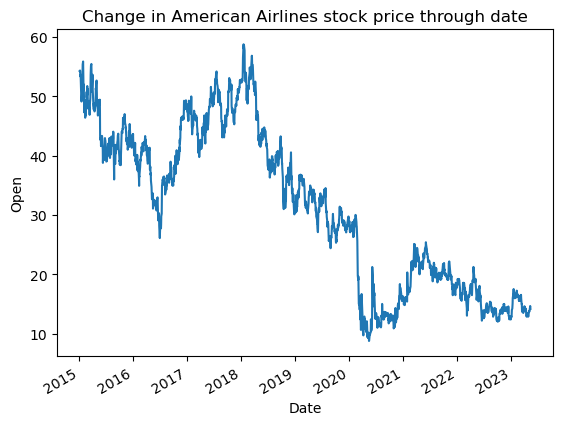

In [11]:

# plot price of gold for each increasing day
data["Open"].plot()
plt.title("Change in American Airlines stock price through date")
plt.xlabel("Date")
plt.ylabel("Open")
plt.show()

# Splitting X and Y into taining and testing varaibles

In [12]:
X=data[['Open','High','Low']]
y=data['Close']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [14]:
X_train.shape,X_test.shape


((1578, 3), (527, 3))

In [15]:
y_train.shape,y_test.shape

((1578,), (527,))

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[33.49429947 56.40659946 27.56509987 13.60359991 13.59110012 30.94749983
 40.24400013 13.09740004 23.97369999 48.73439949 13.35850014 50.6477
 40.00770016 50.6057996  34.24579998 38.09309971 47.52149994 46.51940018
 14.10810001 43.51859989 41.48150032 34.4367992  45.12000084 51.59750027
 13.09750001 38.24470024 46.63449966 32.69130003 41.3650996  11.88089997
 46.10250034 16.6928998  44.25120083 45.77709995 36.38499989 17.07269983
 52.18830013 41.79719978 34.64159889 17.99000006 39.59729984 35.30409966
 11.07630002 40.44580044 46.56859924 50.50110043 40.31679939 41.26589951
 30.14329971 13.6295002  28.50130013 12.30570007 21.80159992 30.82970013
 32.1870999  13.18470015 31.94390018 16.62539989 29.09779993 15.75900014
 47.43329964 37.15299908 43.30759903 12.68900003 14.33099992 17.47629953
 54.02330048 11.41000014 14.08019985  9.52079994 43.89620037 41.06860088
 52.51730053 46.28889984 40.45860058 14.40250013 13.82639997 28.47169992
 15.44050016 28.40479996 48.24639973 46.23340076 21.455

In [21]:
# R squared errorY
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9990858492828971


In [22]:
y_test=list(y_test)

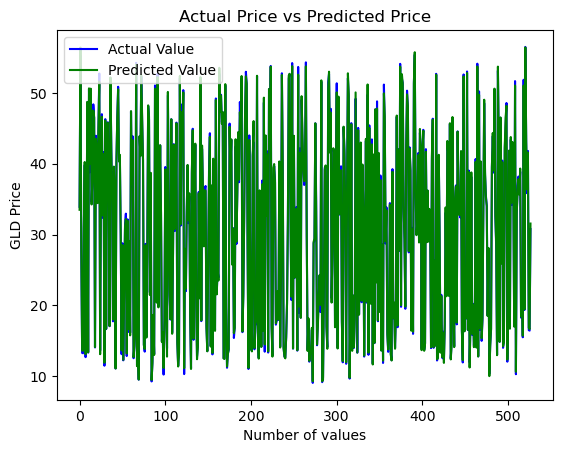

In [23]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Training the model using linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()


In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

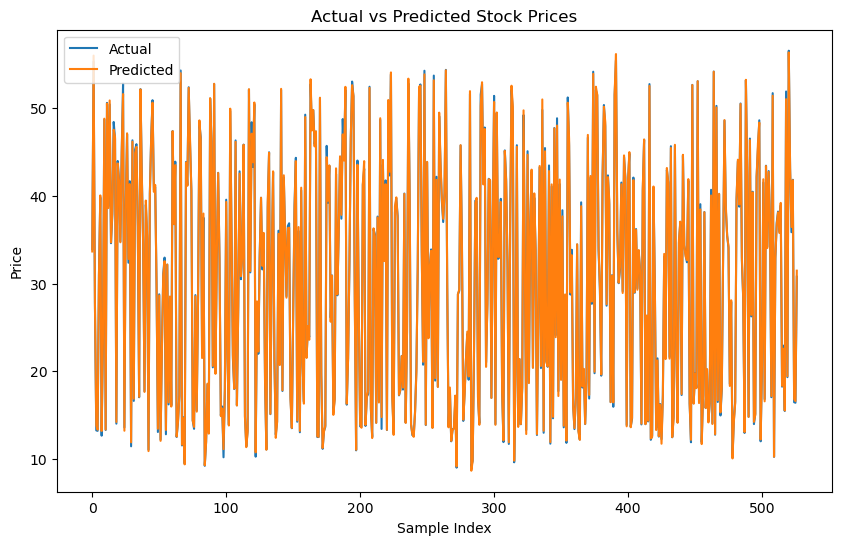

In [28]:
# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [30]:
prediction=reg.predict(X)

In [31]:
prediction

array([53.57253236, 53.68678914, 52.71111648, ..., 14.20152325,
       14.0886768 , 13.9836302 ])

In [32]:
Open=float(input("enter a value"))
High=float(input("enter a value"))
Low=float(input("enter a value"))

data = np.array([[Open,High,Low]])
pred_value = model.predict(data)[0]

print(pred_value)

enter a value34
enter a value56
enter a value43
58.112658512498186


C:\Users\reham\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle
file=open("AAL_model.pkl",'wb')
pickle.dump(model,file)